In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('S50_08012020.csv').drop(['volume', 'complete'], axis=1)
df.head()

,time,open,high,low,close
0,2006-04-28 00:00:00,536.5,542.0,535.6,536.2
1,2006-05-02 00:00:00,536.0,537.2,536.0,536.1
2,2006-05-03 00:00:00,537.0,538.5,537.0,538.5
3,2006-05-04 00:00:00,536.8,536.8,535.6,535.7
4,2006-05-08 00:00:00,536.5,542.0,536.5,541.0


In [3]:
import ta

In [4]:
df['rsi'] = ta.momentum.rsi(df.close, n=14)
df.head()

,time,open,high,low,close,rsi
0,2006-04-28 00:00:00,536.5,542.0,535.6,536.2,100.000000
1,2006-05-02 00:00:00,536.0,537.2,536.0,536.1,0.000000
2,2006-05-03 00:00:00,537.0,538.5,537.0,538.5,96.275072
3,2006-05-04 00:00:00,536.8,536.8,535.6,535.7,43.571072
4,2006-05-08 00:00:00,536.5,542.0,536.5,541.0,73.331230


In [5]:
df['rsi<30'] = df['rsi']<30
df['rsi>70'] = df['rsi']>70

In [6]:
df['rsi>70_shift1'] = df['rsi>70'].shift(1)

In [7]:
df['exit'] = df.loc[(df['rsi>70']==True) & (df['rsi>70_shift1']==False)]['rsi>70']

In [8]:
df.loc[df['exit']==True]

,time,open,high,low,close,rsi,rsi<30,rsi>70,rsi>70_shift1,exit
2,2006-05-03 00:00:00,537.0,538.5,537.0,538.5,96.275072,False,True,False,True
4,2006-05-08 00:00:00,536.5,542.0,536.5,541.0,73.331230,False,True,False,True
119,2006-10-25 00:00:00,510.2,515.5,510.1,515.5,71.449609,False,True,False,True
128,2006-11-07 00:00:00,525.0,526.5,522.9,523.7,71.457068,False,True,False,True
130,2006-11-09 00:00:00,521.6,527.6,521.6,527.0,70.794434,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
2866,2018-01-23 00:00:00,1188.5,1190.9,1182.3,1189.4,71.718339,False,True,False,True
2994,2018-08-01 00:00:00,1125.5,1136.5,1122.7,1136.2,70.658749,False,True,False,True
3209,2019-06-19 00:00:00,1125.5,1141.5,1125.1,1136.9,71.733865,False,True,False,True
3215,2019-06-27 00:00:00,1146.0,1155.0,1145.7,1153.4,72.562583,False,True,False,True


In [9]:
df['entry'] = df['rsi<30'].apply(lambda x: x if x else np.nan)

In [10]:
df['signal'] = df.loc[df['entry']==True]['entry']

In [11]:
df.loc[df['exit']==True, 'signal'] = False

In [12]:
df['signal'] = df['signal'].ffill()

In [13]:
df['signal'] = df['signal'].apply(lambda x: False if pd.isna(x) else x)

In [14]:
df.head()

,time,open,high,low,close,rsi,rsi<30,rsi>70,rsi>70_shift1,exit,entry,signal
0,2006-04-28 00:00:00,536.5,542.0,535.6,536.2,100.000000,False,True,NaN,NaN,NaN,False
1,2006-05-02 00:00:00,536.0,537.2,536.0,536.1,0.000000,True,False,True,NaN,True,True
2,2006-05-03 00:00:00,537.0,538.5,537.0,538.5,96.275072,False,True,False,True,NaN,False
3,2006-05-04 00:00:00,536.8,536.8,535.6,535.7,43.571072,False,False,True,NaN,NaN,False
4,2006-05-08 00:00:00,536.5,542.0,536.5,541.0,73.331230,False,True,False,True,NaN,False


In [15]:
import DeeperTradeLibrary as dpt

In [16]:
result = dpt.Backtest.trade_simulation(df, digit=1, pip_profit=20, commission=80)
result.tail()

,type,open_time,open_price,close_time,close_price,length,pnl,equity
9,True,2013-06-13 00:00:00,931.0,2014-04-21 00:00:00,958.3,209,5380.0,77640.0
10,True,2014-10-16 00:00:00,1007.0,2016-02-26 00:00:00,855.9,332,-30300.0,47340.0
11,True,2016-09-09 00:00:00,921.5,2017-01-04 00:00:00,979.8,78,11580.0,58920.0
12,True,2018-04-04 00:00:00,1124.6,2018-08-01 00:00:00,1136.2,78,2240.0,61160.0
13,True,2018-10-24 00:00:00,1068.3,2019-06-19 00:00:00,1136.9,158,13640.0,74800.0


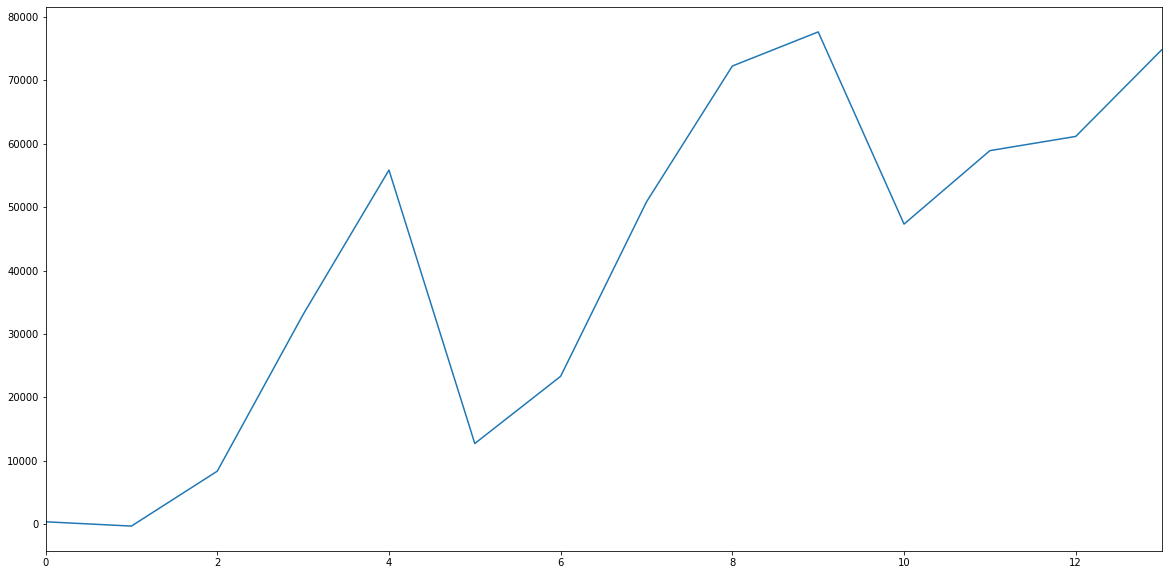

In [17]:
result.equity.plot(figsize=(20,10))